# Mongo feature generation

In [3]:
%load_ext autoreload
%matplotlib inline

In [23]:
import os, sys
import numpy as np
import pandas as pd
import json
from IPython.display import display
sys.path.append(os.path.abspath(os.path.join('../..')))

import plot.evaluation
from database.CERNMongoClient import CERNMongoClient
from preprocessing import feature_extraction
from pipeline import pipeline
from anomaly_detection import factory

# auto-load changes in imported modules
%autoreload 2

In [5]:
dbm=CERNMongoClient()

In [31]:
features = feature_extraction.build_features(dbm,beam=1,end_datetime="2016-08-22 00:00:00")

Building features for beam B1 from 2015-06-22 00:00:00 to 2016-08-22 00:00:00
| MONTH 0
|| Fetching continuous data
Fetching data for pattern ^MKI\.(A|B|C|D).*\.B1:.* from 2015-06-21 00:00:00 to 2015-07-22 00:00:00

Fetching data for pattern ^LHC\.BCTFR\.A6R4\.B1:BEAM_INTENSITY from 2015-06-21 00:00:00 to 2015-07-22 00:00:00

Fetching data for pattern ^LHC\.BQM\.B1:BUNCH_LENGTH_MEAN from 2015-06-21 00:00:00 to 2015-07-22 00:00:00

|| Fetching non-continuous data
Fetching data for pattern ^MKI\.UA23\.IPOC\.(A|B|C|D)B1:.* from 2015-06-22 00:00:00 to 2015-07-22 00:00:00

|| Joining data
|| Computing & joining sliding window MEAN DIFF
|| Original length: 13719, Current length: 13719

| MONTH 1
|| Fetching continuous data
Fetching data for pattern ^MKI\.(A|B|C|D).*\.B1:.* from 2015-07-21 00:00:00 to 2015-08-22 00:00:00

Fetching data for pattern ^LHC\.BCTFR\.A6R4\.B1:BEAM_INTENSITY from 2015-07-21 00:00:00 to 2015-08-22 00:00:00

Fetching data for pattern ^LHC\.BQM\.B1:BUNCH_LENGTH_MEAN fro


Fetching data for pattern ^LHC\.BQM\.B1:BUNCH_LENGTH_MEAN from 2016-07-21 00:00:00 to 2016-08-22 00:00:00

|| Fetching non-continuous data
Fetching data for pattern ^MKI\.UA23\.IPOC\.(A|B|C|D)B1:.* from 2016-07-22 00:00:00 to 2016-08-22 00:00:00

|| Joining data
|| Computing & joining sliding window MEAN DIFF
|| Original length: 14978, Current length: 14978

Loading file '/Users/thiebout/master/cernthesis-2019/src/../data-cern/features-month_0.csv'.
Loading file '/Users/thiebout/master/cernthesis-2019/src/../data-cern/features-month_1.csv'.
Loading file '/Users/thiebout/master/cernthesis-2019/src/../data-cern/features-month_2.csv'.
Loading file '/Users/thiebout/master/cernthesis-2019/src/../data-cern/features-month_3.csv'.
Loading file '/Users/thiebout/master/cernthesis-2019/src/../data-cern/features-month_4.csv'.
Loading file '/Users/thiebout/master/cernthesis-2019/src/../data-cern/features-month_5.csv'.
Loading file '/Users/thiebout/master/cernthesis-2019/src/../data-cern/features-m

In [32]:
display(features.head())

LHC.BCTFR.A6R4.B1:BEAM_INTENSITY  \
timestamps                                              
2015-06-22 14:14:41                               0.0   
2015-06-22 14:14:51                               0.0   
2015-06-22 14:15:01                               0.0   
2015-06-22 14:15:11                               0.0   
2015-06-22 14:15:21                               0.0   

                     LHC.BCTFR.A6R4.B1:BEAM_INTENSITY:SW_MEAN_DIFF_600_s  \
timestamps                                                                 
2015-06-22 14:14:41                                                0.0     
2015-06-22 14:14:51                                                0.0     
2015-06-22 14:15:01                                                0.0     
2015-06-22 14:15:11                                                0.0     
2015-06-22 14:15:21                                                0.0     

                     LHC.BQM.B1:BUNCH_LENGTH_MEAN  \
timestamps                                          
2015-06-22 14:14:41                           0.0   
2015-06-22 14:14:51                           0.0   
2015-06-22 14:15:01                           0.0   
2015-06-22 14:15:11                           0.0   
2015-06-22 14:15:21                           0.0   

                     LHC.BQM.B1:BUNCH_LENGTH_MEAN:SW_MEAN_DIFF_600_s  \
timestamps                                                             
2015-06-22 14:14:41                                              0.0   
2015-06-22 14:14:51                                              0.0   
2015-06-22 14:15:01                                              0.0   
2015-06-22 14:15:11                                              0.0   
2015-06-22 14:15:21                                              0.0   

                     MKI.A5L2.B1:PRESSURE  \
timestamps                                  
2015-06-22 14:14:41          6.900000e-11   
2015-06-22 14:14:51          6.900000e-11   
2015-06-22 14:15:01          6.900000e-11   
2015-06-22 14:15:11          6.900000e-11   
2015-06-22 14:15:21          6.900000e-11   

                     MKI.A5L2.B1:PRESSURE:SW_MEAN_DIFF_600_s  \
timestamps                                                     
2015-06-22 14:14:41                             1.124449e-24   
2015-06-22 14:14:51                             1.124449e-24   
2015-06-22 14:15:01                             1.124449e-24   
2015-06-22 14:15:11                             1.124449e-24   
2015-06-22 14:15:21                             1.124449e-24   

                     MKI.A5L2.B1:TEMP_MAGNET_DOWN  \
timestamps                                          
2015-06-22 14:14:41                          22.3   
2015-06-22 14:14:51                          22.3   
2015-06-22 14:15:01                          22.3   
2015-06-22 14:15:11                          22.3   
2015-06-22 14:15:21                          22.3   

                     MKI.A5L2.B1:TEMP_MAGNET_DOWN:SW_MEAN_DIFF_600_s  \
timestamps                                                             
2015-06-22 14:14:41                                     8.633094e-13   
2015-06-22 14:14:51                                     8.633094e-13   
2015-06-22 14:15:01                                     8.633094e-13   
2015-06-22 14:15:11                                     8.633094e-13   
2015-06-22 14:15:21                                     8.633094e-13   

                     MKI.A5L2.B1:TEMP_MAGNET_UP  \
timestamps                                        
2015-06-22 14:14:41                        21.0   
2015-06-22 14:14:51                        21.0   
2015-06-22 14:15:01                        21.0   
2015-06-22 14:15:11                        21.0   
2015-06-22 14:15:21                        21.0   

                     MKI.A5L2.B1:TEMP_MAGNET_UP:SW_MEAN_DIFF_600_s  \
timestamps                                                           
2015-06-22 14:14:41                                            0.0   
2

In [33]:
# SET ANOMALY DETECTOR AND PARAMETERS
anomaly_detector = "gmm"
detector_parameters = {
        "n_components": 6,
        "covariance_type": "full",
        "tol": 1e-3,
        "reg_covar": 1e-6,
        "max_iter": 100,
        "n_init": 3,
        "init_params": 'kmeans',
        "weights_init": None,
        "means_init": None,
        "precisions_init": None,
        "random_state": None,
        "warm_start": False,
        "verbose": 1,
        "verbose_interval": 10
}

detector = factory.AnomalyDetectorFactory.create(anomaly_detector, **detector_parameters)

Fetching data for pattern MKI.ELOGBOOK_tagged from 2015-06-22 00:00:00 to 2016-11-28 00:00:00

|| GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=6, n_init=3, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=1,
        verbose_interval=10, warm_start=False, weights_init=None)
|| scale_data = True


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


Initialization 0
  Iteration 0
  Iteration 10
  Iteration 20
Initialization converged: True
Initialization 1
  Iteration 0
  Iteration 10
  Iteration 20
  Iteration 30
Initialization converged: True
Initialization 2
  Iteration 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
Initialization converged: True


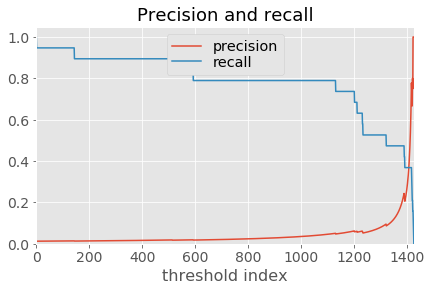

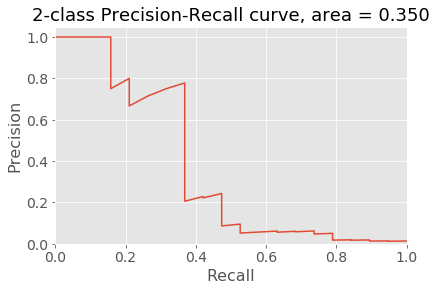

In [36]:
labels = dbm.query_elogbook_anomalies(beam=1)
truth_and_pred_df, auc, precision, recall, thresholds, execution_time = pipeline.pipeline(features, labels, anomaly_detector, detector_parameters)

MAKING PREDICTIONS FOR THRESHOLD: 0.03518447067283876
TP:     7 | FP:    12  || sum:   19
FN:    12 | TN:  1802  || sum: 1814
PRECISION: 0.37, RECALL: 0.37



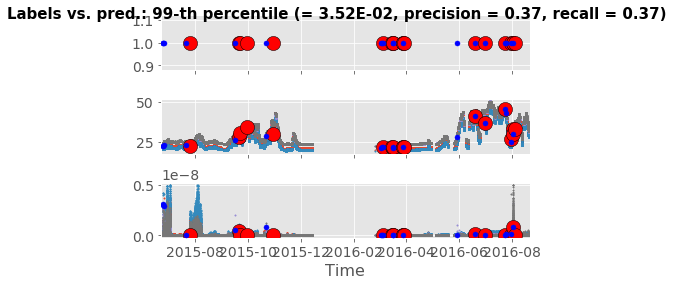

MAKING PREDICTIONS FOR THRESHOLD: 0.019002345022954375
TP:     9 | FP:    28  || sum:   37
FN:    10 | TN:  1786  || sum: 1796
PRECISION: 0.24, RECALL: 0.47



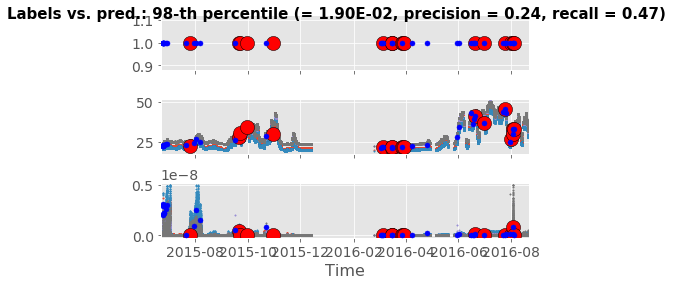

MAKING PREDICTIONS FOR THRESHOLD: 0.013431321677092616
TP:     9 | FP:    83  || sum:   92
FN:    10 | TN:  1731  || sum: 1741
PRECISION: 0.10, RECALL: 0.47



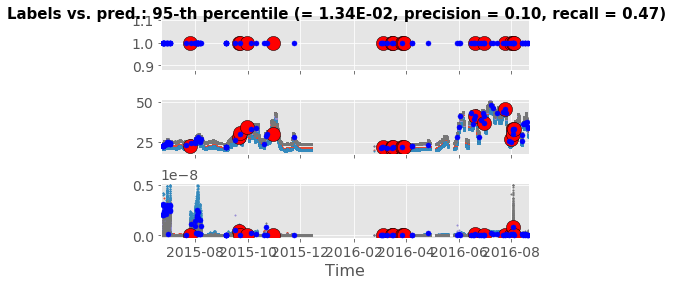

In [44]:
# Features to plot the labels and predictions on
feature_regexes = [regex for regex in ["TEMP_MAGNET_UP$", "PRESSURE$"]
                           if len(features.filter(regex=regex).columns) > 0]
plot.evaluation.labels_vs_predictions_for_different_thresholds(
            truth_and_pred_df=truth_and_pred_df,
            features=features,
            feature_regexes=feature_regexes,
            show=True)